In [1]:
from scipy.io import wavfile
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fftshift
import sys

#KYW inst
fs, data = wavfile.read('/Users/kevinbrennan/Desktop/Final Project/Music-Technology-Final-Project/Sound Examples/KYW Inst.wav')
#ATF Drums
#fs, data = wavfile.read('/Users/kevinbrennan/Desktop/Final Project/Music-Technology-Final-Project/Sound Examples/Around the fur drums.wav')

# Get the bit depth of the audio data (assumes audio_data is a NumPy array)
bit_depth = data.dtype.itemsize * 8

# Calculate the scaling factor for normalization
scaling_factor = 2 ** (bit_depth - 1)  # For signed audio

# Convert audio data to floating-point values and normalize
data = data.astype(np.float32) / scaling_factor

# Verify that the data is now in the range -1 to 1
print(f"Min Value: {np.min(data)}")
print(f"Max Value: {np.max(data)}")

Min Value: -0.9484677314758301
Max Value: 0.9998999834060669


In [14]:
# Implementation from W3

#Variables
dB_gain = -20
A = np.sqrt(pow(10, (dB_gain/20)))

Q = 0.75

cornerFreq_lo = 500

cornerFreq_hi = 1500


w0_lo = 2 * np.pi * (cornerFreq_lo / fs)
w0_hi = 2 * np.pi * (cornerFreq_hi / fs)

alpha_lo = (np.sin(w0_lo) / (2 * Q))
alpha_hi = (np.sin(w0_hi) / (2 * Q))

In [11]:
# Low Shelf

b0 = A * ((A + 1) - (A - 1) * np.cos(w0_lo) + (2 * np.sqrt(A) * alpha_lo))
b1 = 2*A * ((A - 1) - (A + 1) * np.cos(w0_lo))
b2 = A * ((A + 1) - (A - 1) * np.cos(w0_lo) - (2 * np.sqrt(A) * alpha_lo))
a0 = (A + 1) + (A - 1) * np.cos(w0_lo) + (2 * np.sqrt(A) * alpha_lo)
a1 = -2 * ((A - 1) + (A + 1) * np.cos(w0_lo))
a2 = (A + 1) + (A - 1) * np.cos(w0_lo) - (2 * np.sqrt(A) * alpha_lo)

num_lo = [b0, b1, b2]
den_lo = [a0, a1, a2]

w2_lo, H_lo = signal.freqz(num_lo, den_lo)

In [12]:
# High Shelf

b0h = A * ((A + 1) + (A - 1) * np.cos(w0_hi) + (2 * np.sqrt(A) * alpha_hi))
b1h = (-2 * A ) * ((A - 1) + (A + 1) * np.cos(w0_hi))
b2h = A * ((A + 1) + (A - 1) * np.cos(w0_hi) - (2 * np.sqrt(A) * alpha_hi))
a0h = (A + 1) - (A - 1) * np.cos(w0_hi) + (2 * np.sqrt(A) * alpha_hi)
a1h = 2 * ((A - 1) - (A + 1) * np.cos(w0_hi))
a2h = (A + 1) - (A - 1) * np.cos(w0_hi) - (2 * np.sqrt(A) * alpha_hi)

num_hi = [b0h, b1h, b2h]
den_hi = [a0h, a1h, a2h]

w2_hi, H_hi = signal.freqz(num_hi, den_hi)

/var/folders/wl/6gyc0yz53snb8mbsbvf6rnh80000gn/T/ipykernel_66022/1884397005.py:15: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([0, fs/2])  # Set x-axis limits
/var/folders/wl/6gyc0yz53snb8mbsbvf6rnh80000gn/T/ipykernel_66022/1884397005.py:29: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([0, fs/2])  # Set x-axis limits


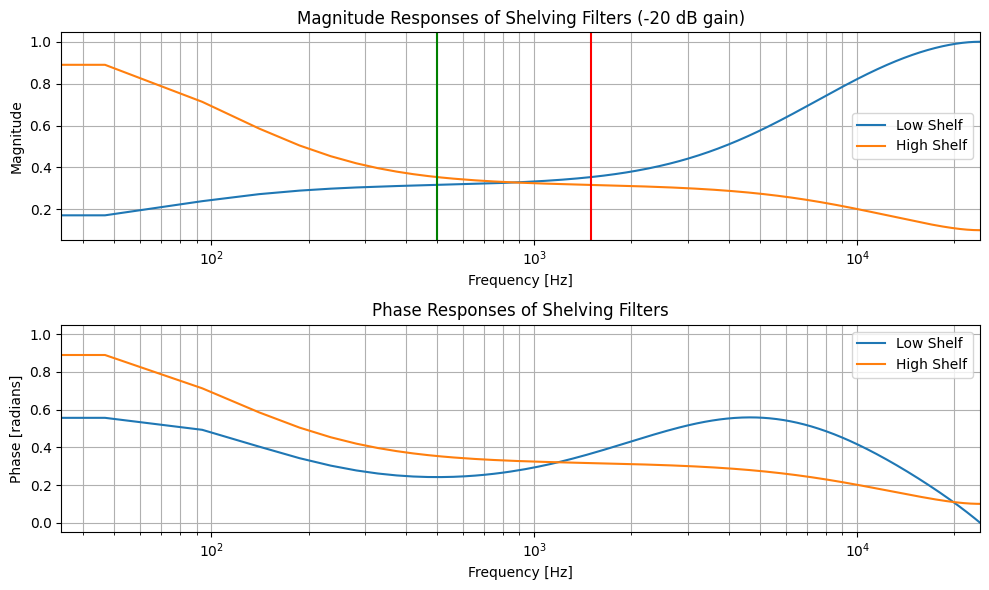

In [13]:
freq_hz_lo = w2_lo * (fs / (2 * np.pi))

freq_hz_hi = w2_hi * (fs / (2 * np.pi))

# Plot magnitude and phase responses in Hz
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(freq_hz_lo, np.abs(H_lo), label='Low Shelf')
plt.plot(freq_hz_hi, np.abs(H_hi), label='High Shelf')
plt.title('Magnitude Responses of Shelving Filters (-20 dB gain)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid(which='both')
plt.xscale('log')  # Set x-axis to a logarithmic scale
plt.xlim([0, fs/2])  # Set x-axis limits
plt.axvline(cornerFreq_lo, color='green')
plt.axvline(cornerFreq_hi, color='red')
plt.legend()


plt.subplot(2, 1, 2)
plt.plot(freq_hz_lo, np.angle(H_lo), label='Low Shelf')
plt.plot(freq_hz_hi, np.abs(H_hi), label='High Shelf')
plt.title('Phase Responses of Shelving Filters')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [radians]')
plt.grid(which='both')
plt.xscale('log')  # Set x-axis to a logarithmic scale
plt.xlim([0, fs/2])  # Set x-axis limits
plt.legend()


plt.tight_layout()
plt.show()

In [38]:
### Filtering Data ###
b = num_hi
a = den_hi

data_filtL = signal.lfilter(b, a, data[:,0])
data_filtR = signal.lfilter(b, a, data[:,1])

stereoFiltered = np.vstack((data_filtL, data_filtR))
stereoFiltered = np.transpose(stereoFiltered) 

sd.play(stereoFiltered, fs)